In [3]:
from fastdtw import fastdtw
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sounddevice as sd

In [112]:
frames = np.load('test.npy')


### Plotting the waveform

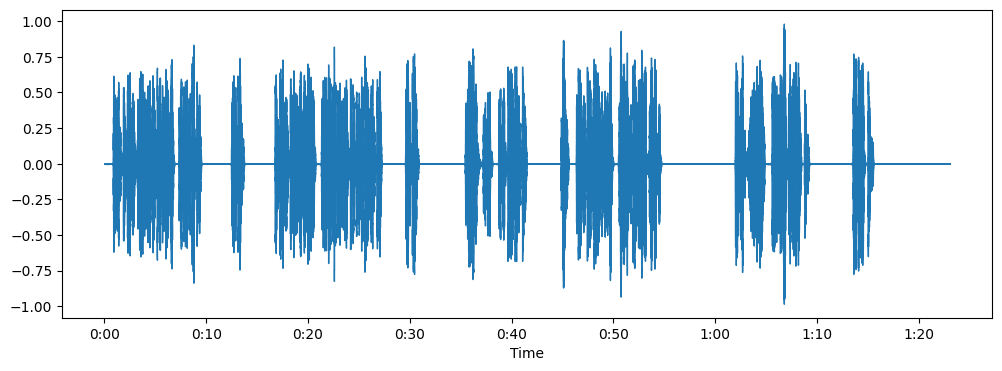

In [184]:
y, sr = librosa.load('./test_aaico_challenge.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=16000)

### Using Fast Dynamic Time Warping for matching similar amplitude envelopes
Amplitude envelopes are used to reduce the total number of samples used.
Amplitude envelopes give a rough approximation of the waveform

In [448]:
def is_galactic(frame, template, threshold):
    distance,_ = fastdtw(frame, template)
    if distance < threshold:
        return 1
    else:
        return 0

In [282]:
FRAME_SIZE = 512
HOP_LENGTH = 64
# Hoplength is used for overlapping frames
def amplitude_envelope(signal,frame_size, hop_length):
    amplitude_envelope = []
    for i in range(0,len(signal), hop_length):
        current_frame_amplitude_envelope = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_envelope)
    return np.array(amplitude_envelope) 

### Using all 3 occurences of 'Galactic' as reference amplitude envelopes

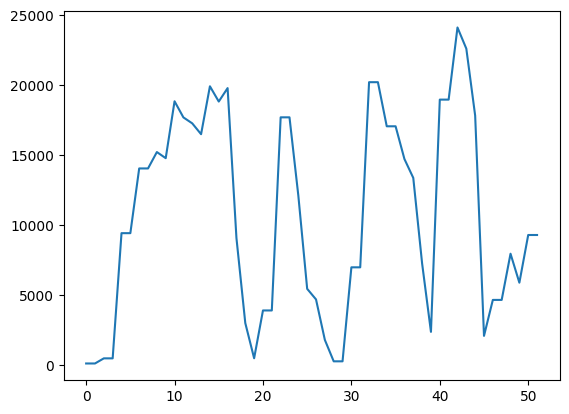

In [465]:
template1 = []
for i in range(280,280+26):
    frame = frames[i]
    for i in range(0,512,256):
        template1.append(max(frame[i:]))
plt.plot(range(len(template1)) , template1)

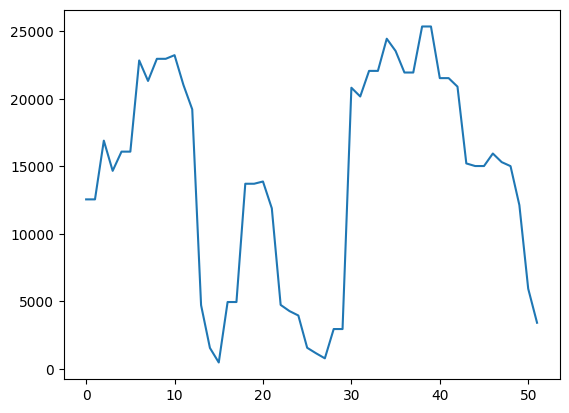

In [425]:
template2 = []
for i in range(670,670+26):
    frame = frames[i]
    for i in range(0,512,256):
        template2.append(max(frame[i:]))
plt.plot(range(len(template2)) , template2)


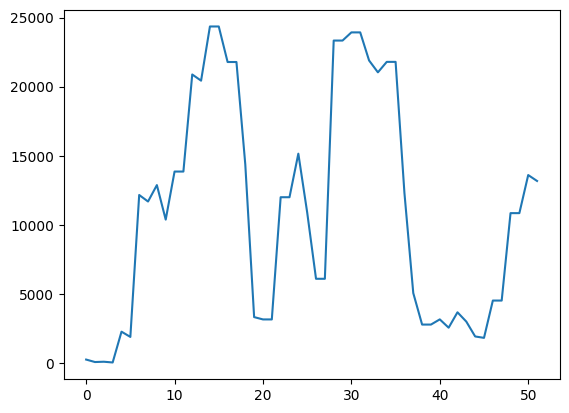

In [459]:
template3 = []
for i in range(1210,1210+26):
    frame = frames[i]
    for i in range(0,512,256):
        template3.append(max(frame[i:]))
plt.plot(range(len(template3)) , template3)

In [445]:
frame_length = 512

### Sequentially analyzing every frame

In [ ]:
working_set = []
findings = {}
output = []
till_next = 0
for i in range(len(frames)):
    frame = frames[i]
    if i>26:
        del working_set[:2]
        ans1 = is_galactic(working_set,template1,100000) 
        ans2 = is_galactic(working_set,template2,100000) 
        ans3 = is_galactic(working_set,template3,100000) 

        ans = ans1 | ans2 | ans3
        
        if ans>0:
            print(i-25)
            till_next = 25
        if till_next >0:
            list_samples_id = np.arange(i*frame_length, (i+1)*frame_length)
            labels = [1 for _ in range(len(list_samples_id))]
        else:
            list_samples_id = np.arange(i*frame_length, (i+1)*frame_length)
            labels = [0 for _ in range(len(list_samples_id))]
        till_next-=1
        output.append(labels)
    for i in range(0,512,256):
        working_set.append(max(frame[i:]))

for j in range(27):
    if till_next >0:
        list_samples_id = np.arange(i*frame_length, (i+1)*frame_length)
        labels = [1 for _ in range(len(list_samples_id))]
    else:
        list_samples_id = np.arange(i*frame_length, (i+1)*frame_length)
        labels = [0 for _ in range(len(list_samples_id))]
    till_next-=1
    output.append(labels)



In [454]:
len(output)

1883

In [455]:
len(frames)

1883

### Saving all 3 templates to use in the .py file

In [444]:
with open('template1.npy', 'wb') as f:
    np.save(f, np.array(template1))
with open('template2.npy', 'wb') as f:
    np.save(f, np.array(template2))
with open('template3.npy', 'wb') as f:
    np.save(f, np.array(template3))